In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [21]:
df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


/tmp/ipykernel_11500/3416091828.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V28,Amount,Class
count,284805.000000,284805.000000,284805.000000,284805.000000,284805.000000,2.848050e+05,2.848050e+05,2.848050e+05,284805.000000,284805.000000,...,284804.000000,284804.000000,284804.000000,284804.000000,284804.000000,284804.000000,284803.000000,284803.000000,284802.000000,284799.000000
mean,94813.993869,-0.000002,-0.000003,-0.000008,-0.000007,9.059168e-07,-6.665561e-07,5.970616e-08,-0.000009,0.000005,...,0.000001,-0.000002,0.000004,0.000008,0.000044,-0.000012,0.000005,0.001373,88.349430,0.001728
std,47488.285653,1.958701,1.651313,1.516257,1.415870,1.380248e+00,1.332275e+00,1.237096e+00,1.194364,1.098631,...,0.770929,0.734531,0.725700,0.624466,0.605927,0.521276,0.482228,0.614593,250.122074,0.041528
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-1.137433e+02,-2.616051e+01,-4.355724e+01,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-15.430084,0.000000,0.000000
25%,54201.000000,-0.920375,-0.598555,-0.890372,-0.848643,-6.915906e-01,-7.682961e-01,-5.540676e-01,-0.208633,-0.643093,...,-0.211728,-0.228400,-0.542342,-0.161845,-0.354567,-0.317158,-0.326979,-0.052960,5.590000,0.000000
50%,84693.000000,0.018109,0.065486,0.179845,-0.019850,-5.433583e-02,-2.741873e-01,4.010308e-02,0.022356,-0.051429,...,-0.062481,-0.029448,0.006787,-0.011191,0.040977,0.016550,-0.052121,0.011244,22.000000,0.000000
75%,139321.000000,1.315648,0.803720,1.027190,0.743328,6.119260e-01,3.985604e-01,5.704465e-01,0.327346,0.597138,...,0.133050,0.186386,0.528557,0.147648,0.439529,0.350711,0.240959,0.078288,77.160000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,3.480167e+01,7.330163e+01,1.205895e+02,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,9.990000,7.519589,3.517346,256.000000,25691.160000,1.000000


In [ ]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

In [18]:
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.0017305236944570482


In [ ]:
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284307


In [25]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284307.000000
mean         88.291763
std         250.108215
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27        object
V28       float64
Amount    float64
Class     float64
dtype: object

In [37]:
# Try printing a few values from object-type columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(df[col].unique()[:5])  # print sample unique values



Column: V27
[0.133558376740387 -0.0089830991432281 -0.0553527940384261
 0.0627228487293033 0.219422229513348]


In [38]:
df_clean = df.select_dtypes(include=['number'])  # keeps only numeric columns


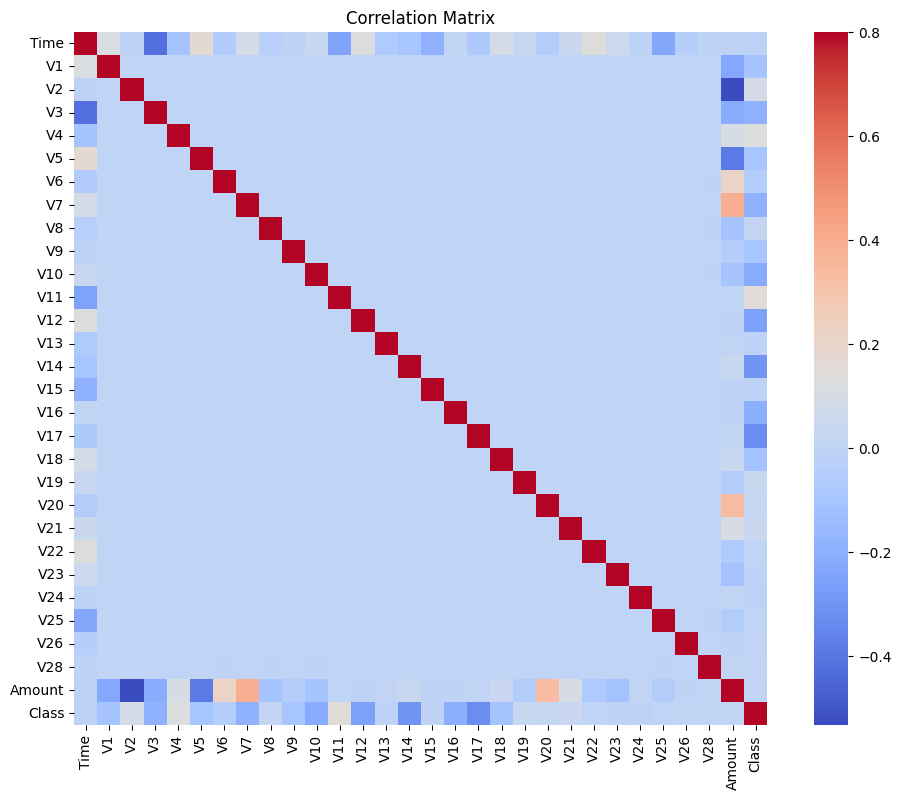

In [39]:
corrmat = df_clean.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [41]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(284805, 30)
(284805,)


In [44]:
import pandas as pd

df = pd.read_csv('creditcard.csv', on_bad_lines='skip', dtype=str)

In [45]:
for col in df.columns:
    print(f"{col}: sample values -> {df[col].unique()[:5]}")


Time: sample values -> ['0' '1' '2' '4' '7']
V1: sample values -> ['-1.3598071336738' '1.19185711131486' '-1.35835406159823'
 '-0.966271711572087' '-1.15823309349523']
V2: sample values -> ['-0.0727811733098497' '0.26615071205963' '-1.34016307473609'
 '-0.185226008082898' '0.877736754848451']
V3: sample values -> ['2.53634673796914' '0.16648011335321' '1.77320934263119'
 '1.79299333957872' '1.548717846511']
V4: sample values -> ['1.37815522427443' '0.448154078460911' '0.379779593034328'
 '-0.863291275036453' '0.403033933955121']
V5: sample values -> ['-0.338320769942518' '0.0600176492822243' '-0.503198133318193'
 '-0.0103088796030823' '-0.407193377311653']
V6: sample values -> ['0.462387777762292' '-0.0823608088155687' '1.80049938079263'
 '1.24720316752486' '0.0959214624684256']
V7: sample values -> ['0.239598554061257' '-0.0788029833323113' '0.791460956450422'
 '0.23760893977178' '0.592940745385545']
V8: sample values -> ['0.0986979012610507' '0.0851016549148104' '0.247675786588991'
 

In [46]:
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, set invalid ones to NaN
df = df.dropna()  # Drop rows with NaNs (caused by malformed values)


In [52]:
from imblearn.over_sampling import SMOTE


Model Evaluation Metrics:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
Matthews Correlation Coefficient: 0.9998


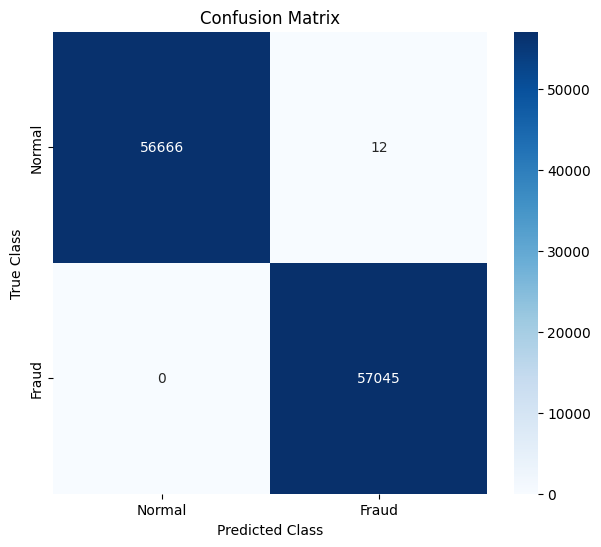

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef
)

from imblearn.over_sampling import SMOTE

# Apply SMOTE for balancing classes
sm = SMOTE(random_state=42)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

# Train-Test Split
xTrain, xTest, yTrain, yTest = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  Train Random Forest Model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain, yTrain)

# Predict
yPred = rfc.predict(xTest)

# Evaluation Metrics
acc = accuracy_score(yTest, yPred)
prec = precision_score(yTest, yPred)
rec = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion Matrix
cm = confusion_matrix(yTest, yPred)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
